In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
import plotly.express as px #if using plotly
import geopandas as gpd
import pyproj
from util import *
from pathlib import Path


shapefile = gpd.read_file("data/gda2020/GDA2020/qld_localities.shp")
shapefile.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)


# shapefile.to_file("data/gda2020/GDA2020/qld_localities.json", driver = "GeoJSON")
with open("data/gda2020/GDA2020/qld_localities.json") as geofile:
    j_file = json.load(geofile)

In [5]:
paths_translink = list(Path("output/translink").iterdir())


df_combine = csv_to_df(paths_translink[0])

coords = gpd.GeoDataFrame(
    df_combine, geometry=gpd.points_from_xy(df_combine.lon, df_combine.lat), crs="EPSG:4326"
)


lss = gpd.sjoin(shapefile, coords, how="inner", predicate='contains')

lss.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 633 entries, 19 to 3303
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LC_PLY_PID        633 non-null    object  
 1   LOC_PID           633 non-null    object  
 2   DT_CREATE         633 non-null    object  
 3   LOC_NAME          633 non-null    object  
 4   LOC_CLASS         633 non-null    object  
 5   STATE             633 non-null    object  
 6   geometry          633 non-null    geometry
 7   index_right       633 non-null    int64   
 8   rain_dbz          633 non-null    int64   
 9   timestamp_radar   633 non-null    int64   
 10  route_id_x        633 non-null    object  
 11  trip_id           633 non-null    object  
 12  lat               633 non-null    float64 
 13  lon               633 non-null    float64 
 14  vehicle_label     633 non-null    object  
 15  vehicle_id        633 non-null    object  
 16  stop_id           633

In [6]:
lss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 633 entries, 19 to 3303
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LC_PLY_PID        633 non-null    object  
 1   LOC_PID           633 non-null    object  
 2   DT_CREATE         633 non-null    object  
 3   LOC_NAME          633 non-null    object  
 4   LOC_CLASS         633 non-null    object  
 5   STATE             633 non-null    object  
 6   geometry          633 non-null    geometry
 7   index_right       633 non-null    int64   
 8   rain_dbz          633 non-null    int64   
 9   timestamp_radar   633 non-null    int64   
 10  route_id_x        633 non-null    object  
 11  trip_id           633 non-null    object  
 12  lat               633 non-null    float64 
 13  lon               633 non-null    float64 
 14  vehicle_label     633 non-null    object  
 15  vehicle_id        633 non-null    object  
 16  stop_id           633

In [7]:
from util import *

s = get_choropleth(lss)

In [8]:
s

,LOC_NAME,geometry,upcoming_stops
0,Albany Creek,"POLYGON ((152.98037 -27.37263, 152.98006 -27.3...",234.00
1,Albion,"POLYGON ((153.04217 -27.44194, 153.04209 -27.4...",-19.00
2,Alderley,"POLYGON ((152.99831 -27.43761, 152.99822 -27.4...",228.00
3,Alexandra Headland,"POLYGON ((153.11271 -26.67612, 153.11235 -26.6...",174.00
4,Algester,"POLYGON ((153.03461 -27.62867, 153.03396 -27.6...",56.00
...,...,...,...
230,Woorim,"POLYGON ((153.17836 -27.09950, 153.17497 -27.0...",-3.00
231,Wynnum,"POLYGON ((153.17521 -27.45615, 153.17506 -27.4...",23.00
232,Yamanto,"POLYGON ((152.74797 -27.66508, 152.74717 -27.6...",-101.00
233,Yandina,"POLYGON ((152.96626 -26.58462, 152.96553 -26.5...",0.00


<Axes: >

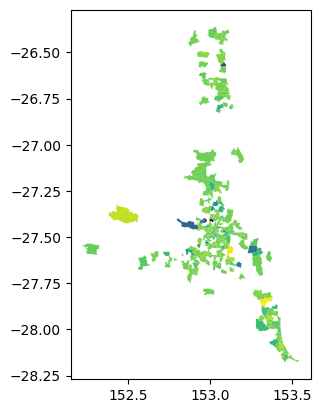

In [12]:
fig = gpd.GeoDataFrame(s).plot(column="upcoming_stops")
